In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [2]:
# The function to plot parameters

def PlotParameters(model): 
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

In [3]:
# Plot the data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

In [4]:
# Create and print the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [5]:
# Create and print the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [6]:
# Print the type of the element

print("Type of data element: ", train_dataset[0][1].type())

AttributeError: 'int' object has no attribute 'type'

In [7]:
# Print the label

print("The label: ", train_dataset[3][1])

The label:  1


The image:  None


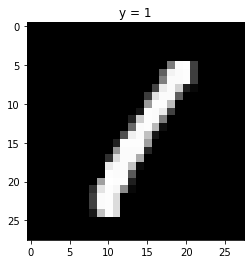

In [8]:
# Plot the image

print("The image: ", show_data(train_dataset[3]))

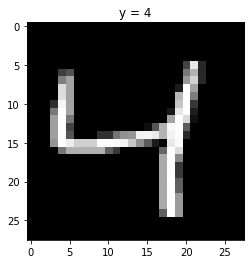

In [9]:
show_data(train_dataset[2])

In [10]:
train_dataset[2][1]

4

In [11]:
# build a softmax classifier

class SoftMax(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self,x):
        z = self.linear(x)
        return z

In [12]:
# print the shape of train dataset

train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [14]:
input_dim = 28 * 28
output_dim = 10

In [15]:
model = SoftMax(input_dim, output_dim)
print('Print the model: \n', model)

Print the model: 
 SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [16]:
# print the parameters

print('W: ', list(model.parameters())[0].size())
print('b: ', list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


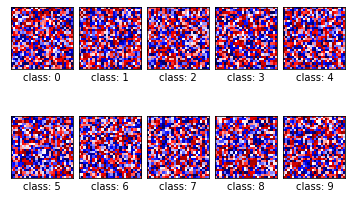

In [17]:
PlotParameters(model)

In [18]:
from torch.utils.data import Dataset, DataLoader

In [19]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset = train_dataset, batch_size = 100)
validation_loader = DataLoader(dataset = validation_dataset, batch_size = 5000)

In [20]:
# train the model

n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28*28))
            loss = criterion(z,y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        # perform a prediction on the validation data
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28*28))
            _, yhat = torch.max(z.data,1)
            correct += (yhat==y_test).sum().item()
        
        accuracy = correct/N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)
        
train_model(n_epochs)

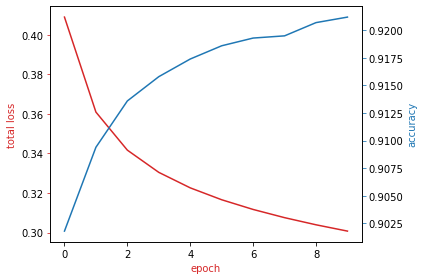

In [21]:
# plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('total loss', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(accuracy_list, color=color)
ax2.set_ylabel('accuracy', color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

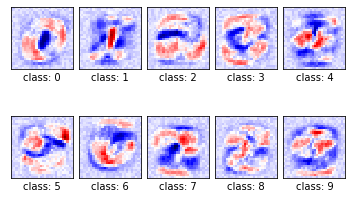

In [22]:
PlotParameters(model)

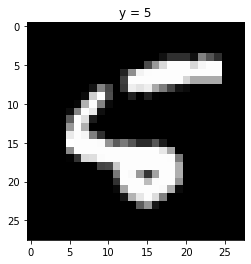

yhat: tensor([6])
probability of class: 0.989648699760437


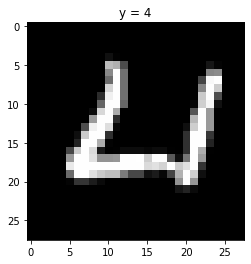

yhat: tensor([6])
probability of class: 0.4636152386665344


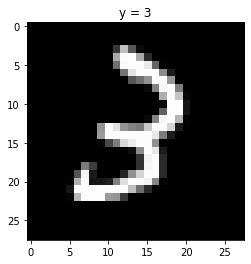

yhat: tensor([2])
probability of class: 0.6643862724304199


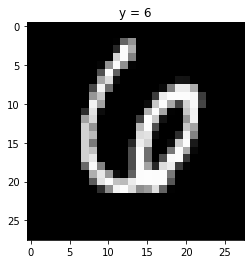

yhat: tensor([7])
probability of class: 0.36910849809646606


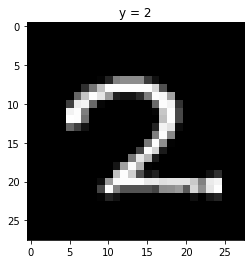

yhat: tensor([7])
probability of class: 0.5600274205207825


In [23]:
# plot the misclaasified samples

Softmax_fn = nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28*28))
    _, yhat = torch.max(z,1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print('yhat:', yhat)
        print('probability of class:', torch.max(Softmax_fn(z)).item())
        count +=1
    if count >= 5:
        break

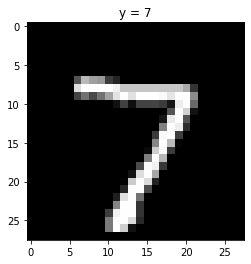

yhat: tensor([7])
Probability of class: 0.9965341091156006


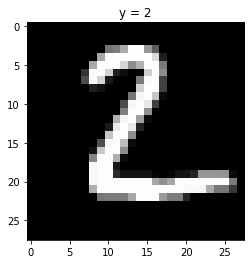

yhat: tensor([2])
Probability of class: 0.9466291069984436


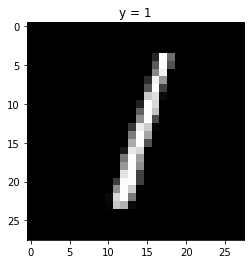

yhat: tensor([1])
Probability of class: 0.9758464097976685


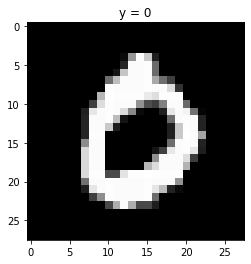

yhat: tensor([0])
Probability of class: 0.9995920062065125


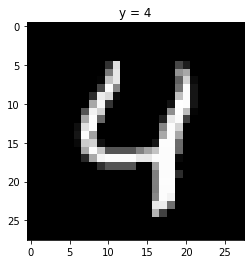

yhat: tensor([4])
Probability of class: 0.9500084519386292


In [24]:
# plot the classified samples

Softmax_fn = nn.Softmax(dim=-1)
count = 0

for x, y in validation_dataset:
    z = model(x.reshape(-1, 28*28))
    _, yhat = torch.max(z,1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print('yhat:', yhat)
        print('Probability of class:', torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break